In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy
import smurf

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,dynamo-release,scikit-learn,cvxopt,pandas,scipy,numpy,networkx,pre-commit,colorcet,loompy,openpyxl,matplotlib,get-version,tqdm,setuptools
version,0.5.3,0.5.7,0.9.11,0.9.40,0.11.2,0.13.2,0.55.2,1.1.0,1.1.1,1.3.0,1.4.3,1.8.1,1.22.4,2.8.4,2.19.0,3.0.0,3.0.7,3.0.10,3.5.2,3.5.4,4.64.0,61.2.0


In [49]:
# adata = dyn.read_loom('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus.loom')
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(type(adata.obs['clusters']))
print(adata)

# data = pd.read_hdf('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(data)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [4]:
# print(adata.layers['spliced'].shape)
s = adata.to_df(layer='spliced')
u = adata.to_df(layer='unspliced')
data = adata.to_df()
# frames = [data,s,u]
# data = pd.concat(frames)
s.fillna(0,inplace=True)
u.fillna(0,inplace=True)
# print(s)
# print(adata.obs['clusters'])

In [8]:
# data = data.loc[:,(data!=0).any(axis=0)]
# s = s.loc[:,(s!=0).any(axis=0)]
# u = u.loc[:,(u!=0).any(axis=0)]
# print(data)
print(s.shape)

(2930, 13264)


In [50]:
scanpy.pp.filter_genes(adata, min_cells=1, max_cells=None) 
print(adata.shape)

s = adata.to_df(layer='spliced')
u = adata.to_df(layer='unspliced')
data = adata.to_df()

# print(s.shape)
# print(u.shape)

u = u.loc[:,(u!=0).any(axis=0)]
print(u.columns)
print(u.shape)

var_name = u.columns

# print(adata.var)
adata = adata[:,adata.var.index.isin(var_name)]
print(adata.shape)

s = adata.to_df(layer='spliced')
print(s.shape)
print(u.shape)

(2930, 13264)
Index(['Tcea1', 'Atp6v1h', 'Rb1cc1', 'St18', 'Pcmtd1', 'Adhfe1', 'Sgk3',
       'Mcmdc2', 'Cspp1', 'Prex2',
       ...
       'Egfl6', 'Tmsb4x', 'Prps2', 'Frmpd4', 'Msl3', 'Kdm5d', 'Eif2s3y',
       'Erdr1', 'Uty', 'Ddx3y'],
      dtype='object', name='index', length=8599)
(2930, 8599)
(2930, 8599)
(2930, 8599)
(2930, 8599)


In [42]:
# create a SMURF object which only return the imputed data
operator = smurf.SMURF(n_features=20, estimate_only=True)

# impute
data_imputed = operator.smurf_impute(s)

# create a SMURF object
operator = smurf.SMURF(n_features=20, estimate_only=False)

# impute
s_res = operator.smurf_impute(s)

# get the results
data_imputed = s_res["estimate"]

gene_matrix = s_res["gene latent factor matrix"]

cell_matrix = s_res["cell latent factor matrix"]

Running SCEnd on 8599 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10
Running SCEnd on 8599 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10


In [43]:
# u.fillna(0,inplace=True)

# create a SMURF object which only return the imputed data
operator = smurf.SMURF(n_features=20, estimate_only=True)

# impute
data_imputed = operator.smurf_impute(u)

# create a SMURF object
operator = smurf.SMURF(n_features=20, estimate_only=False)

# impute
u_res = operator.smurf_impute(u)

# get the results
data_imputed = u_res["estimate"]

gene_matrix = u_res["gene latent factor matrix"]

cell_matrix = u_res["cell latent factor matrix"]

Running SCEnd on 8599 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10
Running SCEnd on 8599 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10


In [44]:
print(adata)

View of AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    var: 'n_cells'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced'


In [55]:
import scipy
# spliced = scanpy.AnnData(s)
spliced = scipy.sparse.csr_matrix(s.values)
unspliced = scipy.sparse.csr_matrix(u.values)

# print(spliced)

# print(adata.layers['spliced'])

# adata.to_df(layer='X_spliced').loc[:,(s!=0).any(axis=0)]
# print(type(adata.layers['X_spliced']))
# rows, cols = adata.layers['X_spliced'].nonzero()
# print(rows,cols)
adata.layers['spliced'] = spliced
adata.layers['unspliced'] = unspliced
# print(spliced)
# spliced
# print(adata.to_df(layer='X_spliced'))

print(adata.layers['unspliced'])

  (0, 10)	1.0
  (0, 57)	1.0
  (0, 118)	1.0
  (0, 120)	1.0
  (0, 165)	1.0
  (0, 180)	1.0
  (0, 191)	1.0
  (0, 195)	2.0
  (0, 210)	1.0
  (0, 258)	2.0
  (0, 277)	1.0
  (0, 349)	1.0
  (0, 398)	1.0
  (0, 460)	2.0
  (0, 470)	1.0
  (0, 472)	1.0
  (0, 497)	1.0
  (0, 518)	1.0
  (0, 532)	1.0
  (0, 599)	1.0
  (0, 607)	1.0
  (0, 646)	2.0
  (0, 698)	1.0
  (0, 749)	4.0
  (0, 755)	1.0
  :	:
  (2929, 7730)	1.0
  (2929, 7747)	1.0
  (2929, 7761)	1.0
  (2929, 7848)	2.0
  (2929, 7899)	1.0
  (2929, 7919)	1.0
  (2929, 7941)	1.0
  (2929, 7969)	1.0
  (2929, 7989)	1.0
  (2929, 8030)	1.0
  (2929, 8058)	1.0
  (2929, 8077)	2.0
  (2929, 8086)	5.0
  (2929, 8104)	2.0
  (2929, 8111)	1.0
  (2929, 8134)	1.0
  (2929, 8210)	1.0
  (2929, 8213)	1.0
  (2929, 8232)	1.0
  (2929, 8254)	1.0
  (2929, 8265)	3.0
  (2929, 8289)	1.0
  (2929, 8331)	1.0
  (2929, 8437)	2.0
  (2929, 8524)	1.0


In [56]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [57]:
print(adata.layers['X_spliced'].shape)

(2930, 8599)


In [58]:
dyn.tl.dynamics(adata,model='stochastic')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [9.7324s]


estimating gamma: 100%|██████████| 2000/2000 [01:17<00:00, 25.69it/s]


AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moment

In [59]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.3431s]


In [60]:
# dyn.tl.cell_velocities(adata)
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'}, enforce=True, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [7.4168s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.9400s]


AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spli

In [61]:
# dyn.vf.VectorField(adata,basis = 'umap')
dyn.tl.cell_wise_confidence(adata)

AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

|-----------> plotting with basis key=X_umap
|-----------> skip filtering clusters by stack threshold when stacking color because it is not a numeric type


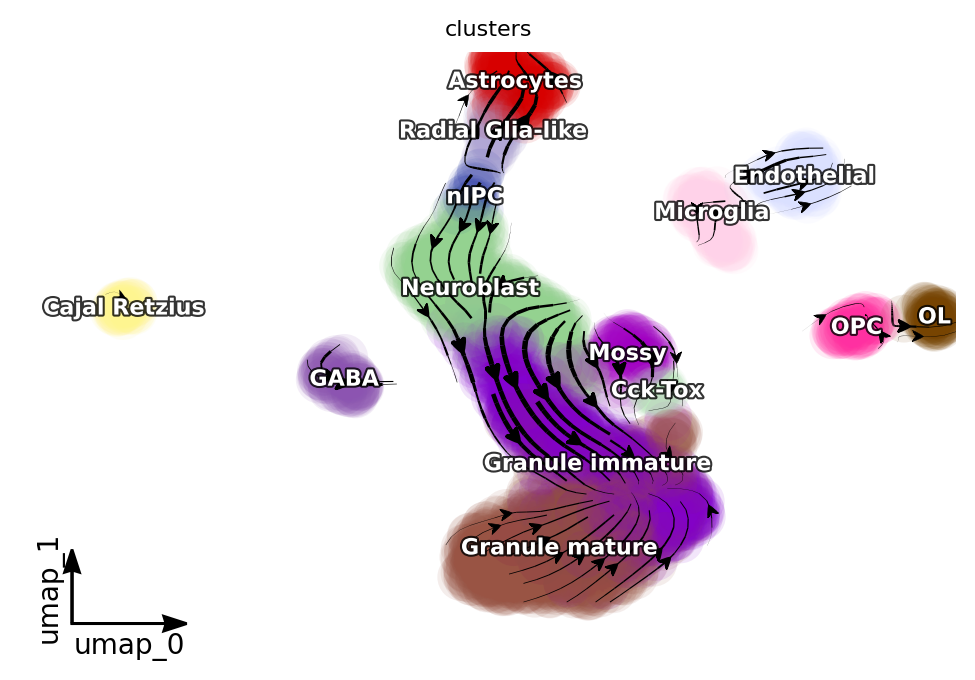

In [62]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
# f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [63]:
adata

AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

In [64]:
print(adata.obs['jaccard_velocity_confidence'])

index
AAACATACCCATGA    0.307339
AAACATACCGTAGT    0.652632
AAACATACGAGAGC    0.245283
AAACATACTGAGGG    0.480226
AAACATTGGCATCA    0.289593
                    ...   
TTTCTACTTCCCGT    0.431535
TTTGACTGCCTGTC    0.525140
TTTGACTGTCTGGA    0.257642
TTTGCATGGGAGTG    0.630137
TTTGCATGTTCTTG    0.430341
Name: jaccard_velocity_confidence, Length: 2930, dtype: float64


In [65]:
# adata.obsm[[key for key in adata.obsm if key.startswith('velocity_S')][0]]
# v_emb = adata.obsm['{}_umap'.format('velocity_S')]

In [66]:
import eval_util
from imp import reload
reload(eval_util)

cluster_edges = [("OPC", "OL")]
eval_util.evaluate(adata, cluster_edges, 'clusters', "velocity_S", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): 0.001566955409355969}
Total Mean: 0.001566955409355969
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.6833681894659046}
Total Mean: 0.6833681894659046
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.8408775870137148}
Total Mean: -0.8408775870137148
# In-cluster Coherence
{'Astrocytes': 0.8397671145042764, 'Cajal Retzius': 0.9887961282485278, 'Cck-Tox': 0.9583553499706853, 'Endothelial': 0.950849300064246, 'GABA': 0.9434490273037385, 'Granule immature': 0.9249107510097627, 'Granule mature': 0.8928670069294841, 'Microglia': 0.9810405366164159, 'Mossy': 0.9380892242520665, 'Neuroblast': 0.9567834715115457, 'OL': 0.9219680123791754, 'OPC': 0.9356181429119791, 'Radial Glia-like': 0.9080142909853252, 'nIPC': 0.9551952731843101}
Total Mean: 0.9354074021336813
# In-cluster Confidence
{'Astrocytes': 0.691809042969019, 'Cajal Retzius': 0.88681151063117, 'Cck-Tox': 0.41384519260108615, 'Endothelial': 0.7254985

{'Cross-Boundary Transition Score (A->B)': {('OPC',
   'OL'): [-8.513802348697664e-05, 0.0004062056994078148, 0.000720262714517575, 0.00598890251812176, 0.0034261098646912965, 0.0026858695493502905, 0.0003875568795457339, -0.0009941259272997429]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC',
   'OL'): [0.710583941677612, 0.6848754545038862, 0.7051181852603968, 0.7586783886740449, 0.6943425082359012, 0.6797161608050186, 0.6668105917292414, 0.566820284841136]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.9955712543620266, -0.7864713631687016, -0.9563320323234501, -0.9992087049978972, -0.7871518045402487, -0.2212722599656828, -0.9865026630598613, -0.9945106136918498]},
 'In-cluster Coherence': {'Astrocytes': [0.7653029458786302,
   0.880258813244698,
   0.7845550622238109,
   0.9089603411153945,
   0.7708525755373402,
   0.8599633419835613,
   0.8916843749163644,
   0.888639725226817,
   0.7999257988919556,
   0.8948958319687582,
   0.8021235989087735,


In [ ]:
# Abundance of ['spliced', 'unspliced']: [0.9 0.1]
# Cross-Boundary Transition Score (A->B) {('OPC', 'OL'): 0.00630295} 
# Total Mean: 0.006302949972450733
# # Cross-Boundary Velocity Coherence (A->B) {('OPC', 'OL'): 0.3934500415874338}
#  Total Mean: 0.3934500415874338 
# Cross-Boundary Direction Correctness (A->B) {('OPC', 'OL'): -0.4227274062633888} 
# Total Mean: -0.4227274062633888 
# In-cluster Coherence {'Astrocytes': 0.7609318681810356, 'Cajal Retzius': 0.9378692715572066, 'Cck-Tox': 0.828734583852736, 'Endothelial': 0.9314706331659218, 'GABA': 0.882795543614253, 'Granule immature': 0.7868408703982197, 'Granule mature': 0.7489468911509204, 'Microglia': 0.7524512450389534, 'Mossy': 0.8492471138928402, 'Neuroblast': 0.7524816364622642, 'OL': 0.9347272229079507, 'OPC': 0.9451652802702815, 'Radial Glia-like': 0.9283747568913194, 'nIPC': 0.9197938162835281} 
# Total Mean: 0.8542736238333878 
# # In-cluster Confidence {'Astrocytes': 0.7537898279256907, 'Cajal Retzius': 0.9332962276885705, 'Cck-Tox': 0.7505103008792292, 'Endothelial': 0.9221172614286053, 'GABA': 0.8864795512978749, 'Granule immature': 0.7682340803641703, 'Granule mature': 0.7337182506902056, 'Microglia': 0.7429558783303785, 'Mossy': 0.8291995007567275, 'Neuroblast': 0.7423294623889758, 'OL': 0.9311022403250092, 'OPC': 0.9390802734135254, 'Radial Glia-like': 0.8904570023880877, 'nIPC': 0.8826370031044427} 
# Total Mean: 0.8361362043558208
print('')
